In [3]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',as_frame=False)


In [5]:
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

In [6]:
print(mnist.data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
print(mnist.target)

['5' '0' '4' ... '4' '5' '6']


In [9]:
len(mnist.data)

70000

In [10]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [11]:
print(mnist.data.shape)

(70000, 784)


In [12]:
print(mnist.target.shape)

(70000,)


In [13]:
mnist.data[0]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
mnist.data[0][1]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
mnist.data[:,1]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
mnist.data[:100]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

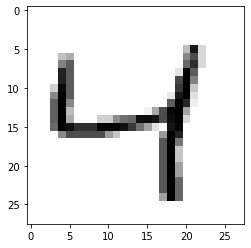

In [44]:
import numpy as np
import matplotlib.pyplot as plt
images=mnist.data.reshape((-1,28,28))
plt.imshow(images[2],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

In [45]:
mnist.target[2]

'4'

In [33]:
indices_random=np.random.randint(70000,size=5000)
print(indices_random)

[15820 49986   468 ... 43159 22347 23783]


In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[indices_random], mnist.target[indices_random], train_size=0.8)

In [37]:
from sklearn import neighbors
k=10
clf=neighbors.KNeighborsClassifier(k)
clf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [49]:
print(ytest[4])
print(clf.predict(xtest)[4])

4
4


In [51]:
clf.score(xtest,ytest)

0.911

In [52]:
clf.score(xtrain,ytrain)

0.94025

In [53]:
from sklearn.model_selection import KFold

In [68]:
max=15
min=2
X=mnist.data[indices_random]
Y=mnist.target[indices_random]
kf=KFold(n_splits=10,shuffle=True)
for k in range (min,max+1,1):
    print("Pour k=",k)
    clf=neighbors.KNeighborsClassifier(k)
    mean=0
    for train, test in kf.split(X):
        clf.fit(X[train],Y[train])
        mean+=clf.score(X[test],Y[test])
    mean=mean/10
    print(mean)

    

Pour k= 2
0.9268000000000001
Pour k= 3
0.9369999999999999
Pour k= 4
0.9321999999999997
Pour k= 5
0.9326000000000001
Pour k= 6
0.9278000000000001
Pour k= 7
0.9274000000000001
Pour k= 8
0.9266000000000002
Pour k= 9
0.9250000000000002
Pour k= 10
0.9244
Pour k= 11
0.9218
Pour k= 12
0.9231999999999999
Pour k= 13
0.9202000000000001
Pour k= 14
0.9216
Pour k= 15
0.9192


In [72]:
k=3
for percentage in range (50,100,2):
    print("Pourcentage de training:",percentage/100)
    xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[indices_random], mnist.target[indices_random], train_size=percentage/100)
    clf=neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain,ytrain)
    print(clf.score(xtest,ytest))

Pourcentage de training: 0.5
0.9128
Pourcentage de training: 0.52
0.9179166666666667
Pourcentage de training: 0.54
0.9195652173913044
Pourcentage de training: 0.56
0.9186363636363636
Pourcentage de training: 0.58
0.92
Pourcentage de training: 0.6
0.925
Pourcentage de training: 0.62
0.9305263157894736
Pourcentage de training: 0.64
0.9277777777777778
Pourcentage de training: 0.66
0.9305882352941176
Pourcentage de training: 0.68
0.91875
Pourcentage de training: 0.7
0.924
Pourcentage de training: 0.72
0.9328571428571428
Pourcentage de training: 0.74
0.933076923076923
Pourcentage de training: 0.76
0.9366666666666666
Pourcentage de training: 0.78
0.9236363636363636
Pourcentage de training: 0.8
0.923
Pourcentage de training: 0.82
0.9366666666666666
Pourcentage de training: 0.84
0.935
Pourcentage de training: 0.86
0.9442857142857143
Pourcentage de training: 0.88
0.9383333333333334
Pourcentage de training: 0.9
0.942
Pourcentage de training: 0.92
0.9375
Pourcentage de training: 0.94
0.94
Pourcen

In [74]:
for size in range (4000,15000,500):
    new_indices_random=np.random.randint(70000,size=size)
    print("Taille échantillon training",size*0.8)
    xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[new_indices_random], mnist.target[new_indices_random], train_size=0.8)
    clf=neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain,ytrain)
    print(clf.score(xtest,ytest))


Taille échantillon training 3200.0
0.93
Taille échantillon training 3600.0
0.9366666666666666
Taille échantillon training 4000.0
0.928
Taille échantillon training 4400.0
0.9372727272727273
Taille échantillon training 4800.0
0.9233333333333333
Taille échantillon training 5200.0
0.9446153846153846
Taille échantillon training 5600.0
0.9292857142857143
Taille échantillon training 6000.0
0.936
Taille échantillon training 6400.0
0.92625
Taille échantillon training 6800.0
0.9411764705882353
Taille échantillon training 7200.0
0.945
Taille échantillon training 7600.0
0.9284210526315789
Taille échantillon training 8000.0
0.9525
Taille échantillon training 8400.0
0.9466666666666667
Taille échantillon training 8800.0
0.9413636363636364
Taille échantillon training 9200.0
0.9578260869565217
Taille échantillon training 9600.0
0.9516666666666667
Taille échantillon training 10000.0
0.95
Taille échantillon training 10400.0
0.9546153846153846
Taille échantillon training 10800.0
0.9548148148148148
Taille 

In [86]:
k=3
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[indices_random], mnist.target[indices_random], train_size=0.8)

clf=neighbors.KNeighborsClassifier(k,p=1)
clf.fit(xtrain,ytrain)
print("Distance Manhattan")
print(clf.score(xtest,ytest))


clf=neighbors.KNeighborsClassifier(k,p=2)
clf.fit(xtrain,ytrain)
print("Distance Euclidienne")
print(clf.score(xtest,ytest))

clf=neighbors.KNeighborsClassifier(k,p=5)
clf.fit(xtrain,ytrain)
print("Distance de Minkowski")
print(clf.score(xtest,ytest))

Distance Manhattan
0.915
Distance Euclidienne
0.931
Distance de Minkowski
0.94


In [97]:
from datetime import datetime
new_indices_random=np.random.randint(70000,size=20000)
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data[new_indices_random], mnist.target[new_indices_random], train_size=0.8)
k=5
start=datetime.now()
clf=neighbors.KNeighborsClassifier(k,p=1,n_jobs=1)
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)
tps=datetime.now()-start
print("Temps que prends un seul job", tps)

start=datetime.now()
clf=neighbors.KNeighborsClassifier(k,p=1,n_jobs=-1)
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)
tps=datetime.now()-start

print("Temps que prends tout les processeurs", tps)

Temps que prends un seul job 0:00:28.755062
Temps que prends tout les processeurs 0:00:12.505022
